# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,\
recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,f1_score,\
classification_report

# Loading dataset

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)


In [4]:
df = data.frame

# splitting and scaling of data

In [5]:
X = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.2)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Pipeline

In [6]:
from sklearn.pipeline import Pipeline

In [27]:
sc = StandardScaler()
from sklearn.decomposition import PCA
pca = PCA()
svm = SVC(probability=True)
pipe = Pipeline([('sc',sc),('pca',pca),('svm',svm)])



In [28]:
parameters = {
    'pca__n_components':[2],
    'svm__kernel':["rbf"]
}
grid = GridSearchCV(pipe,param_grid=parameters,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('svm', SVC(probability=True))]),
             param_grid={'pca__n_components': [2], 'svm__kernel': ['rbf']},
             scoring='accuracy')

In [29]:
grid.best_params_

{'pca__n_components': 2, 'svm__kernel': 'rbf'}

In [30]:
grid.cv_results_

{'mean_fit_time': array([0.02097073]),
 'std_fit_time': array([0.00096973]),
 'mean_score_time': array([0.00646749]),
 'std_score_time': array([0.00019198]),
 'param_pca__n_components': masked_array(data=[2],
              mask=[False],
        fill_value=999999),
 'param_svm__kernel': masked_array(data=['rbf'],
              mask=[False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'pca__n_components': 2, 'svm__kernel': 'rbf'}],
 'split0_test_score': array([0.89010989]),
 'split1_test_score': array([0.92307692]),
 'split2_test_score': array([0.97802198]),
 'split3_test_score': array([0.93406593]),
 'split4_test_score': array([0.96703297]),
 'mean_test_score': array([0.93846154]),
 'std_test_score': array([0.0315444]),
 'rank_test_score': array([1], dtype=int32)}

In [31]:
best_index = grid.best_index_
print(f"mean score: {grid.cv_results_["mean_test_score"][best_index]}")

mean score: 0.9384615384615385


In [32]:
print(f"standard deviation score: {grid.cv_results_["std_test_score"][best_index]}")

standard deviation score: 0.03154439581188423


In [33]:
y_pred = grid.predict(x_test)

# Model Evaluation

In [34]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[38,  4],
       [ 3, 69]])

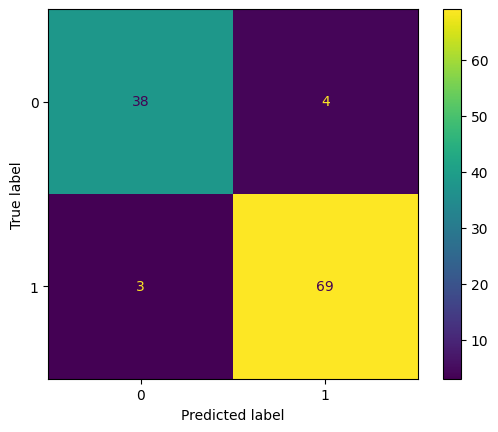

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(conf).plot()

In [36]:
print(f"Classification report: /n{classification_report(y_test,y_pred)}")

Classification report: /n              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [41]:
from sklearn.metrics import roc_auc_score,roc_curve
y_prob = grid.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_prob[:,1])
roc_score = roc_auc_score(y_test,y_prob[:,1])


In [42]:
print(f"ROC AUC score: {roc_score}")

ROC AUC score: 0.9927248677248677


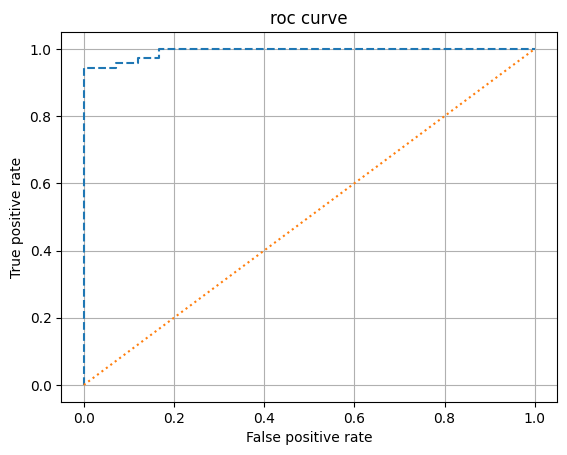

In [50]:
plt.plot(fpr,tpr,linestyle = "--",label=f"AUC score {roc_score:.3f}")
plt.plot([0,1],[0,1],ls = 'dotted')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("roc curve")
plt.grid()

# SVM comparison

In [51]:
grid.best_params_

{'pca__n_components': 2, 'svm__kernel': 'rbf'}

In [52]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
models = {
    "SVM":SVC(kernel="rbf"),
    "Logistic Regression": LogisticRegression(),
    "Random forest": RandomForestClassifier()
}

In [54]:
accuracy = []
for name , model in models.items():
  print(f"Name of Model: {name}")
  classifier = models[name].fit(x_train_pca,y_train)
  y_pred = classifier.predict(x_test_pca)
  acc = accuracy_score(y_test,y_pred)
  print(f"Accuracy score: {acc}")
  print(f"recall score : {recall_score(y_test,y_pred)}")
  print()


Name of Model: SVM
Accuracy score: 0.9385964912280702
recall score : 0.9583333333333334

Name of Model: Logistic Regression
Accuracy score: 0.9736842105263158
recall score : 0.9722222222222222

Name of Model: Random forest
Accuracy score: 0.956140350877193
recall score : 0.9583333333333334



# Saving best model

In [55]:
best_model = LogisticRegression()
best_model.fit(x_train_pca,y_train)
best_model

LogisticRegression()

In [56]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [57]:
from joblib import dump
dump(best_model,'/content/drive/MyDrive/AIML_PRACTICE/SVM_assignments/best_cancer_model.joblib')
print("Model Saved successfully")

Model Saved successfully


### Summary: Why SVM is a Strong Choice for This Dataset

For this dataset, **Support Vector Machine (SVM)** demonstrates several important strengths when compared with **Logistic Regression** and **Random Forest**, even though its overall accuracy is slightly lower. The SVM model achieves an accuracy of **0.9386** with a **high recall of 0.9583**, indicating that it is very effective at correctly identifying positive cases. High recall is especially critical in sensitive classification problems (such as medical diagnosis), where missing a positive instance can be far more costly than producing a few false positives.

Compared to **Logistic Regression**, which shows the highest accuracy (**0.9737**) and recall (**0.9722**), SVM offers greater robustness in handling complex, high-dimensional feature spaces. Logistic Regression assumes a linear decision boundary, whereas SVM can model non-linear relationships through kernel functions, making it more flexible when class separation is not strictly linear.

When compared with **Random Forest**, which achieves an accuracy of **0.9561** and the same recall (**0.9583**) as SVM, SVM has the advantage of better generalization in high-dimensional datasets with limited samples. Random Forests rely on multiple decision trees and can sometimes overfit or become less stable with correlated features, while SVM focuses only on **support vectors**, resulting in a more compact and margin-maximizing decision boundary.

In summary, although Logistic Regression slightly outperforms SVM in terms of raw accuracy for this dataset, **SVM remains a strong and reliable model due to its high recall, robustness to high-dimensional data, and ability to handle complex decision boundaries**. These advantages make SVM particularly suitable when correct detection of positive cases is a priority and when the underlying data distribution is not strictly linear.

